### Enhance Balance Numberplate Generator

In [1]:
import random
import string
from collections import defaultdict

# List of valid Indian state codes
states = [
    'AN', 'AP', 'AR', 'AS', 'BR', 'CH', 'DN', 'DD', 'DL', 'GA', 'GJ', 'HR',
    'HP', 'JK', 'KA', 'KL', 'LD', 'MP', 'MH', 'MN', 'ML', 'MZ', 'NL', 'OR',
    'PY', 'PN', 'RJ', 'SK', 'TN', 'TR', 'UP', 'WB', 'TS', 'OD', 'JH'
]

# Total plates desired per state
plates_per_state = 500

# Character pools
letters = string.ascii_uppercase
digits = string.digits

# Track character usage separately for different positions
series_char_usage = defaultdict(int)  # For series letters
digit_usage = defaultdict(int)        # For all digit positions

def get_balanced_char(pool, usage_dict):
    """Returns a character from pool with least usage"""
    least_used = min(pool, key=lambda x: usage_dict[x])
    usage_dict[least_used] += 1
    return least_used

def get_weighted_balanced_char(pool, usage_dict, weight=1):
    """Returns a character with weighted selection for better balance"""
    # Calculate usage weights (inverse of current usage)
    min_usage = min(usage_dict[char] for char in pool)
    max_usage = max(usage_dict[char] for char in pool)
    
    if max_usage == min_usage:
        # If all equal, random choice
        char = random.choice(pool)
    else:
        # Prefer characters with lower usage
        weights = []
        for char in pool:
            # Higher weight for less used characters
            char_weight = (max_usage - usage_dict[char] + 1) * weight
            weights.append(char_weight)
        
        char = random.choices(pool, weights=weights)[0]
    
    usage_dict[char] += 1
    return char

def generate_enhanced_balanced_plate(state, separator='-'):
    """Generate plates with multiple strategies to increase letter frequency"""
    
    # Strategy 1: Vary series length (1-3 letters instead of just 1-2)
    series_length = random.choices([1, 2, 3], weights=[2, 5, 3])[0]  # Favor 2-3 letters
    
    # Generate RTO code (01-99) with balanced digits
    rto_digit1 = get_balanced_char(digits, digit_usage)
    rto_digit2 = get_balanced_char(digits, digit_usage)
    rto_code = f"{rto_digit1}{rto_digit2}"
    
    # Generate series with balanced letters (enhanced)
    series = ""
    for _ in range(series_length):
        series += get_weighted_balanced_char(letters, series_char_usage, weight=2)
    
    # Strategy 2: Sometimes use letters in number positions (like vintage plates)
    if random.random() < 0.15:  # 15% chance for vintage-style plates
        # Format: STATE-RTO-SERIES-LNNN or STATE-RTO-SERIES-NNLN
        if random.choice([True, False]):
            # Letter followed by 3 digits
            num_char1 = get_weighted_balanced_char(letters, series_char_usage)
            num_char2 = get_balanced_char(digits, digit_usage)
            num_char3 = get_balanced_char(digits, digit_usage)
            num_char4 = get_balanced_char(digits, digit_usage)
            number = f"{num_char1}{num_char2}{num_char3}{num_char4}"
        else:
            # 2 digits, 1 letter, 1 digit
            num_char1 = get_balanced_char(digits, digit_usage)
            num_char2 = get_balanced_char(digits, digit_usage)
            num_char3 = get_weighted_balanced_char(letters, series_char_usage)
            num_char4 = get_balanced_char(digits, digit_usage)
            number = f"{num_char1}{num_char2}{num_char3}{num_char4}"
    else:
        # Standard 4-digit number
        num_digit1 = get_balanced_char(digits, digit_usage)
        num_digit2 = get_balanced_char(digits, digit_usage)
        num_digit3 = get_balanced_char(digits, digit_usage)
        num_digit4 = get_balanced_char(digits, digit_usage)
        number = f"{num_digit1}{num_digit2}{num_digit3}{num_digit4}"
    
    # Construct plate
    return f"{state}{separator}{rto_code}{series}{separator}{number}"

def generate_additional_letter_heavy_formats(state):
    """Generate some non-standard formats to boost letter frequency"""
    formats = []
    
    # Format 1: STATE-RTO-LLL-NNNN (3 letters)
    rto = f"{get_balanced_char(digits, digit_usage)}{get_balanced_char(digits, digit_usage)}"
    series = "".join([get_weighted_balanced_char(letters, series_char_usage) for _ in range(3)])
    number = "".join([get_balanced_char(digits, digit_usage) for _ in range(4)])
    formats.append(f"{state}-{rto}{series}-{number}")
    
    # Format 2: STATE-RTO-LL-LNNN (letter in number position)
    rto = f"{get_balanced_char(digits, digit_usage)}{get_balanced_char(digits, digit_usage)}"
    series = "".join([get_weighted_balanced_char(letters, series_char_usage) for _ in range(2)])
    letter_in_num = get_weighted_balanced_char(letters, series_char_usage)
    digits_in_num = "".join([get_balanced_char(digits, digit_usage) for _ in range(3)])
    formats.append(f"{state}-{rto}{series}-{letter_in_num}{digits_in_num}")
    
    return formats

# Generate plates with enhanced letter distribution
plates = set()
letter_boost_plates = []

# Generate standard plates with enhanced letter usage
for state in states:
    state_plates = set()
    
    # Generate majority of plates with enhanced balancing
    target_standard = int(plates_per_state * 0.85)  # 85% standard enhanced
    while len(state_plates) < target_standard:
        sep = random.choice(['-', ''])
        plate = generate_enhanced_balanced_plate(state, separator=sep)
        if plate not in plates:
            state_plates.add(plate)
            plates.add(plate)
    
    # Generate some letter-heavy plates for remaining 15%
    remaining = plates_per_state - len(state_plates)
    for _ in range(remaining):
        additional_formats = generate_additional_letter_heavy_formats(state)
        for plate in additional_formats:
            if plate not in plates and len(state_plates) < plates_per_state:
                state_plates.add(plate)
                plates.add(plate)
                letter_boost_plates.append(plate)
                break

# Save to file
with open("enhanced_balanced_plates.txt", "w") as f:
    for plate in sorted(plates):
        f.write(plate + "\n")

print(f"Generated {len(plates)} enhanced balanced number plates")
print(f"Letter-heavy formats: {len(letter_boost_plates)}")
print(f"\nSeries letter usage distribution:")
for letter in sorted(letters):
    print(f"{letter}: {series_char_usage[letter]}")

print(f"\nDigit usage distribution:")
for digit in sorted(digits):
    print(f"{digit}: {digit_usage[digit]}")

# Calculate and display balance metrics
letter_counts = list(series_char_usage.values())
digit_counts = list(digit_usage.values())

if letter_counts:
    letter_min, letter_max = min(letter_counts), max(letter_counts)
    letter_balance = (letter_min / letter_max) * 100 if letter_max > 0 else 100
    print(f"\nLetter balance: {letter_balance:.1f}% (min: {letter_min}, max: {letter_max})")

if digit_counts:
    digit_min, digit_max = min(digit_counts), max(digit_counts)
    digit_balance = (digit_min / digit_max) * 100 if digit_max > 0 else 100
    print(f"Digit balance: {digit_balance:.1f}% (min: {digit_min}, max: {digit_max})")

total_letters = sum(series_char_usage.values())
total_digits = sum(digit_usage.values())
print(f"\nTotal letters generated: {total_letters}")
print(f"Total digits generated: {total_digits}")
print(f"Letter to digit ratio: 1:{total_digits/total_letters:.2f}")

Generated 17500 enhanced balanced number plates
Letter-heavy formats: 2625

Series letter usage distribution:
A: 1909
B: 1907
C: 1909
D: 1908
E: 1910
F: 1907
G: 1908
H: 1910
I: 1910
J: 1907
K: 1909
L: 1907
M: 1909
N: 1908
O: 1909
P: 1910
Q: 1910
R: 1910
S: 1909
T: 1911
U: 1911
V: 1910
W: 1911
X: 1908
Y: 1908
Z: 1910

Digit usage distribution:
0: 11703
1: 11703
2: 11703
3: 11703
4: 11703
5: 11703
6: 11703
7: 11702
8: 11702
9: 11702

Letter balance: 99.8% (min: 1907, max: 1911)
Digit balance: 100.0% (min: 11702, max: 11703)

Total letters generated: 49635
Total digits generated: 117027
Letter to digit ratio: 1:2.36


### Changing the format of the generated txt file:

In [4]:
input_path = "enhanced_balanced_plates.txt"
output_path = "formatted_plates.txt"

with open(input_path, "r") as infile, open(output_path, "w") as outfile:
    for line in infile:
        plate = line.strip()
        if plate:
            formatted_plate = plate.replace("-", " ")
            outfile.write(formatted_plate + "\n")

print("✅ Formatted number plates saved to:", output_path)


✅ Formatted number plates saved to: formatted_plates.txt


### Enhanced Synthetic image generator:

In [12]:
from PIL import Image, ImageDraw, ImageFont, ImageEnhance, ImageFilter
import os
import random
import numpy as np
import cv2
import re

# === CONFIG ===
font_paths = ["LicensePlate.ttf", "CARGO2.TTF", "FE-FONT.TTF"]
template_paths = ["template_1.png", "template_2.jpg", "template_3.png", "template_5.jpg"]
template_paths2 = ["green_1.png","green_4.png","Black_yellow-template.png"]
output_dir = "generated_plates_enhanced_letters"
input_path = "formatted_plates.txt"  # Use the new balanced file

font_sizes = [34,36,38]
font_colors = [(0, 0, 0), (20, 20, 20), (30, 30, 30)]
font_color2 = [(255, 255, 0), (255, 255, 255)]
spacing = 5
text_angle_range = (0,0)

# === Ensure Output Directory Exists ===
os.makedirs(output_dir, exist_ok=True)

# === Helper Functions (same as before) ===
def apply_perspective_and_noise(img):
    img_np = np.array(img)
    h, w = img_np.shape[:2]

    margin = 8
    pts1 = np.float32([[0,0], [w,0], [0,h], [w,h]])
    pts2 = np.float32([
        [random.randint(0, margin), random.randint(0, margin)],
        [w - random.randint(0, margin), random.randint(0, margin)],
        [random.randint(0, margin), h - random.randint(0, margin)],
        [w - random.randint(0, margin), h - random.randint(0, margin)],
    ])
    matrix = cv2.getPerspectiveTransform(pts1, pts2)
    warped = cv2.warpPerspective(img_np, matrix, (w, h), borderMode=cv2.BORDER_REPLICATE)

    noise_stddev = random.uniform(1, 3)
    noise = np.random.normal(0, noise_stddev, warped.shape).astype(np.int16)
    noisy_img = warped.astype(np.int16) + noise
    noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)

    return Image.fromarray(noisy_img)

def add_texture_background(template):
    texture = np.random.randint(220, 255, (template.height, template.width, 3), dtype=np.uint8)
    alpha = 0.1
    base = np.array(template.convert("RGB"))
    blended = cv2.addWeighted(base, 1 - alpha, texture, alpha, 0)
    return Image.fromarray(blended)

def apply_augmentations(img):
    enhancer = ImageEnhance.Brightness(img)
    img = enhancer.enhance(random.uniform(0.6, 1.4))

    enhancer = ImageEnhance.Contrast(img)
    img = enhancer.enhance(random.uniform(0.7, 1.3))

    img_np = np.array(img)

    if random.random() < 0.3:
        radius = random.uniform(0.5, 1.5)
        img = Image.fromarray(cv2.GaussianBlur(img_np, (0, 0), sigmaX=radius))
    elif random.random() < 0.5:
        size = random.randint(3, 15)
        kernel_motion_blur = np.zeros((size, size))
        direction = random.choice(['horizontal', 'vertical'])

        if direction == 'horizontal':
            kernel_motion_blur[size // 2, :] = np.ones(size)
        else:
            kernel_motion_blur[:, size // 2] = np.ones(size)

        kernel_motion_blur /= size
        motion_blur_img = cv2.filter2D(img_np, -1, kernel_motion_blur)
        img = Image.fromarray(motion_blur_img)

    return img

def count_letters_in_plate(plate_text):
    """Count the number of letters in a plate"""
    return len(re.findall(r'[A-Z]', plate_text))

def should_duplicate_plate(plate_text):
    """Decide if a letter-heavy plate should be duplicated"""
    letter_count = count_letters_in_plate(plate_text)
    
    # Higher chance to duplicate plates with more letters
    if letter_count >= 6:  # Very letter-heavy
        return random.random() < 0.4  # 40% chance
    elif letter_count >= 5:  # Moderately letter-heavy
        return random.random() < 0.3  # 30% chance
    elif letter_count >= 4:  # Somewhat letter-heavy
        return random.random() < 0.2  # 20% chance
    else:
        return False

# === Load Plate Texts ===
with open(input_path, "r") as f:
    original_plates = [line.strip() for line in f if line.strip()]

# === Enhanced Plate List with Strategic Duplication ===
enhanced_plates = []
letter_heavy_count = 0

for plate in original_plates:
    enhanced_plates.append(plate)
    
    # Duplicate letter-heavy plates to boost letter frequency
    if should_duplicate_plate(plate):
        enhanced_plates.append(plate)
        letter_heavy_count += 1

print(f"Original plates: {len(original_plates)}")
print(f"Enhanced plates (with duplicates): {len(enhanced_plates)}")
print(f"Letter-heavy plates duplicated: {letter_heavy_count}")

# === Generate Images ===
generated_count = 0
for idx, plate_text in enumerate(enhanced_plates):
    try:
        # Choose random font and size
        font_path = random.choice(font_paths)
        font_size = random.choice(font_sizes)
        
        # Choose template and appropriate font color
        if random.random() < 0.5:
            selected_template = random.choice(template_paths)
            font_color = random.choice(font_colors)
        else:
            selected_template = random.choice(template_paths2)
            font_color = random.choice(font_color2)
            
        font = ImageFont.truetype(font_path, font_size)

        # Load and resize template
        template = Image.open(selected_template).convert("RGBA")
        template = template.resize((280, 64))

        # Calculate bounding box
        draw_dummy = ImageDraw.Draw(template)
        bbox = draw_dummy.textbbox((0, 0), plate_text, font=font, spacing=spacing)
        text_width = bbox[2] - bbox[0]
        text_height = bbox[3] - bbox[1]

        # Create transparent image for text
        text_img = Image.new('RGBA', (text_width+10, text_height+20), (255, 0, 0, 0))
        draw_text = ImageDraw.Draw(text_img)
        draw_text.text((5, 5), plate_text, font=font, fill=font_color + (255,), spacing=spacing)

        # Rotate text slightly
        text_angle = random.uniform(*text_angle_range)
        rotated_text = text_img.rotate(text_angle, expand=2)

        # Paste text on template
        x = (template.width - rotated_text.width) // 2
        y = (template.height - rotated_text.height) // 2
        template.alpha_composite(rotated_text, (x, y))

        # Convert to RGB before further augmentations
        result_img = template.convert("RGB")

        # Apply augmentations
        # result_img = add_texture_background(result_img)
        result_img = apply_augmentations(result_img)
        # result_img = apply_perspective_and_noise(result_img)

        # Save with unique filename (handle duplicates)
        safe_plate = plate_text.replace(" ", "").replace("-", "")
        out_path = os.path.join(output_dir, f"{safe_plate}_{idx}.jpg")
        result_img.save(out_path, quality=random.randint(60, 90))
        generated_count += 1

        if generated_count % 100 == 0:
            print(f"Generated {generated_count} images...")

    except Exception as e:
        print(f"❌ Error with plate '{plate_text}': {e}")

print(f"✅ Generated {generated_count} synthetic plate images with enhanced letter distribution")

# === Statistics ===
total_letters = sum(count_letters_in_plate(plate) for plate in enhanced_plates)
total_chars = sum(len(re.findall(r'[A-Z0-9]', plate)) for plate in enhanced_plates)
print(f"Total letters in dataset: {total_letters}")
print(f"Total alphanumeric chars: {total_chars}")
print(f"Letter percentage: {(total_letters/total_chars)*100:.1f}%")

Original plates: 17500
Enhanced plates (with duplicates): 21357
Letter-heavy plates duplicated: 3857
Generated 100 images...
Generated 200 images...
Generated 300 images...
Generated 400 images...
Generated 500 images...
Generated 600 images...
Generated 700 images...
Generated 800 images...
Generated 900 images...
Generated 1000 images...
Generated 1100 images...
Generated 1200 images...
Generated 1300 images...
Generated 1400 images...
Generated 1500 images...
Generated 1600 images...
Generated 1700 images...
Generated 1800 images...
Generated 1900 images...
Generated 2000 images...
Generated 2100 images...
Generated 2200 images...
Generated 2300 images...
Generated 2400 images...
Generated 2500 images...
Generated 2600 images...
Generated 2700 images...
Generated 2800 images...
Generated 2900 images...
Generated 3000 images...
Generated 3100 images...
Generated 3200 images...
Generated 3300 images...
Generated 3400 images...
Generated 3500 images...
Generated 3600 images...
Generate

### Creating Skewed data set with generated_plates_enhanced_letters:

In [13]:
from image_rotator import create_skewed_dataset


# Define specific rotation angles you want to apply
# rotation_angles = [-12, -8, -4, 0, 4, 8, 12, 15, -15, 10]

create_skewed_dataset(
    straightened_folder='/home/arijit/LPR_project/synthetic_data_generated/generated_plates_enhanced_letters',
    output_folder='skewed_dataset',
    rotation_angles=None,
    angle_range=(-25,25),
    save_labels=True
)

Created output folder: skewed_dataset
Creating skewed dataset from 21357 straightened images
[1/21357] MP90OW1234_13217.jpg -> Skewing by -18.11°
Image saved to: skewed_dataset/MP90OW1234_13217_skewed_-18.1.jpg
[2/21357] SK12GJN3456_18151.jpg -> Skewing by 13.68°
Image saved to: skewed_dataset/SK12GJN3456_18151_skewed_13.7.jpg
[3/21357] BR12KXD3456_2819.jpg -> Skewing by -1.62°
Image saved to: skewed_dataset/BR12KXD3456_2819_skewed_-1.6.jpg
[4/21357] TR45MEK6789_19103.jpg -> Skewing by -21.64°
Image saved to: skewed_dataset/TR45MEK6789_19103_skewed_-21.6.jpg
[5/21357] JK90MAI1234_8907.jpg -> Skewing by 14.13°
Image saved to: skewed_dataset/JK90MAI1234_8907_skewed_14.1.jpg
[6/21357] UP67UES8901_20667.jpg -> Skewing by -18.81°
Image saved to: skewed_dataset/UP67UES8901_20667_skewed_-18.8.jpg
[7/21357] BR78XU9012_2703.jpg -> Skewing by -0.96°
Image saved to: skewed_dataset/BR78XU9012_2703_skewed_-1.0.jpg
[8/21357] TR90EJ1234_19266.jpg -> Skewing by -8.54°
Image saved to: skewed_dataset/TR

[{'original_file': 'MP90OW1234_13217.jpg',
  'skewed_file': 'MP90OW1234_13217_skewed_-18.1.jpg',
  'rotation_angle': -18.10966553783388,
  'status': 'success'},
 {'original_file': 'SK12GJN3456_18151.jpg',
  'skewed_file': 'SK12GJN3456_18151_skewed_13.7.jpg',
  'rotation_angle': 13.679516919494752,
  'status': 'success'},
 {'original_file': 'BR12KXD3456_2819.jpg',
  'skewed_file': 'BR12KXD3456_2819_skewed_-1.6.jpg',
  'rotation_angle': -1.6174128355705264,
  'status': 'success'},
 {'original_file': 'TR45MEK6789_19103.jpg',
  'skewed_file': 'TR45MEK6789_19103_skewed_-21.6.jpg',
  'rotation_angle': -21.635680960236257,
  'status': 'success'},
 {'original_file': 'JK90MAI1234_8907.jpg',
  'skewed_file': 'JK90MAI1234_8907_skewed_14.1.jpg',
  'rotation_angle': 14.133146698870313,
  'status': 'success'},
 {'original_file': 'UP67UES8901_20667.jpg',
  'skewed_file': 'UP67UES8901_20667_skewed_-18.8.jpg',
  'rotation_angle': -18.80937200374921,
  'status': 'success'},
 {'original_file': 'BR78XU901

### character_frequency_plotter

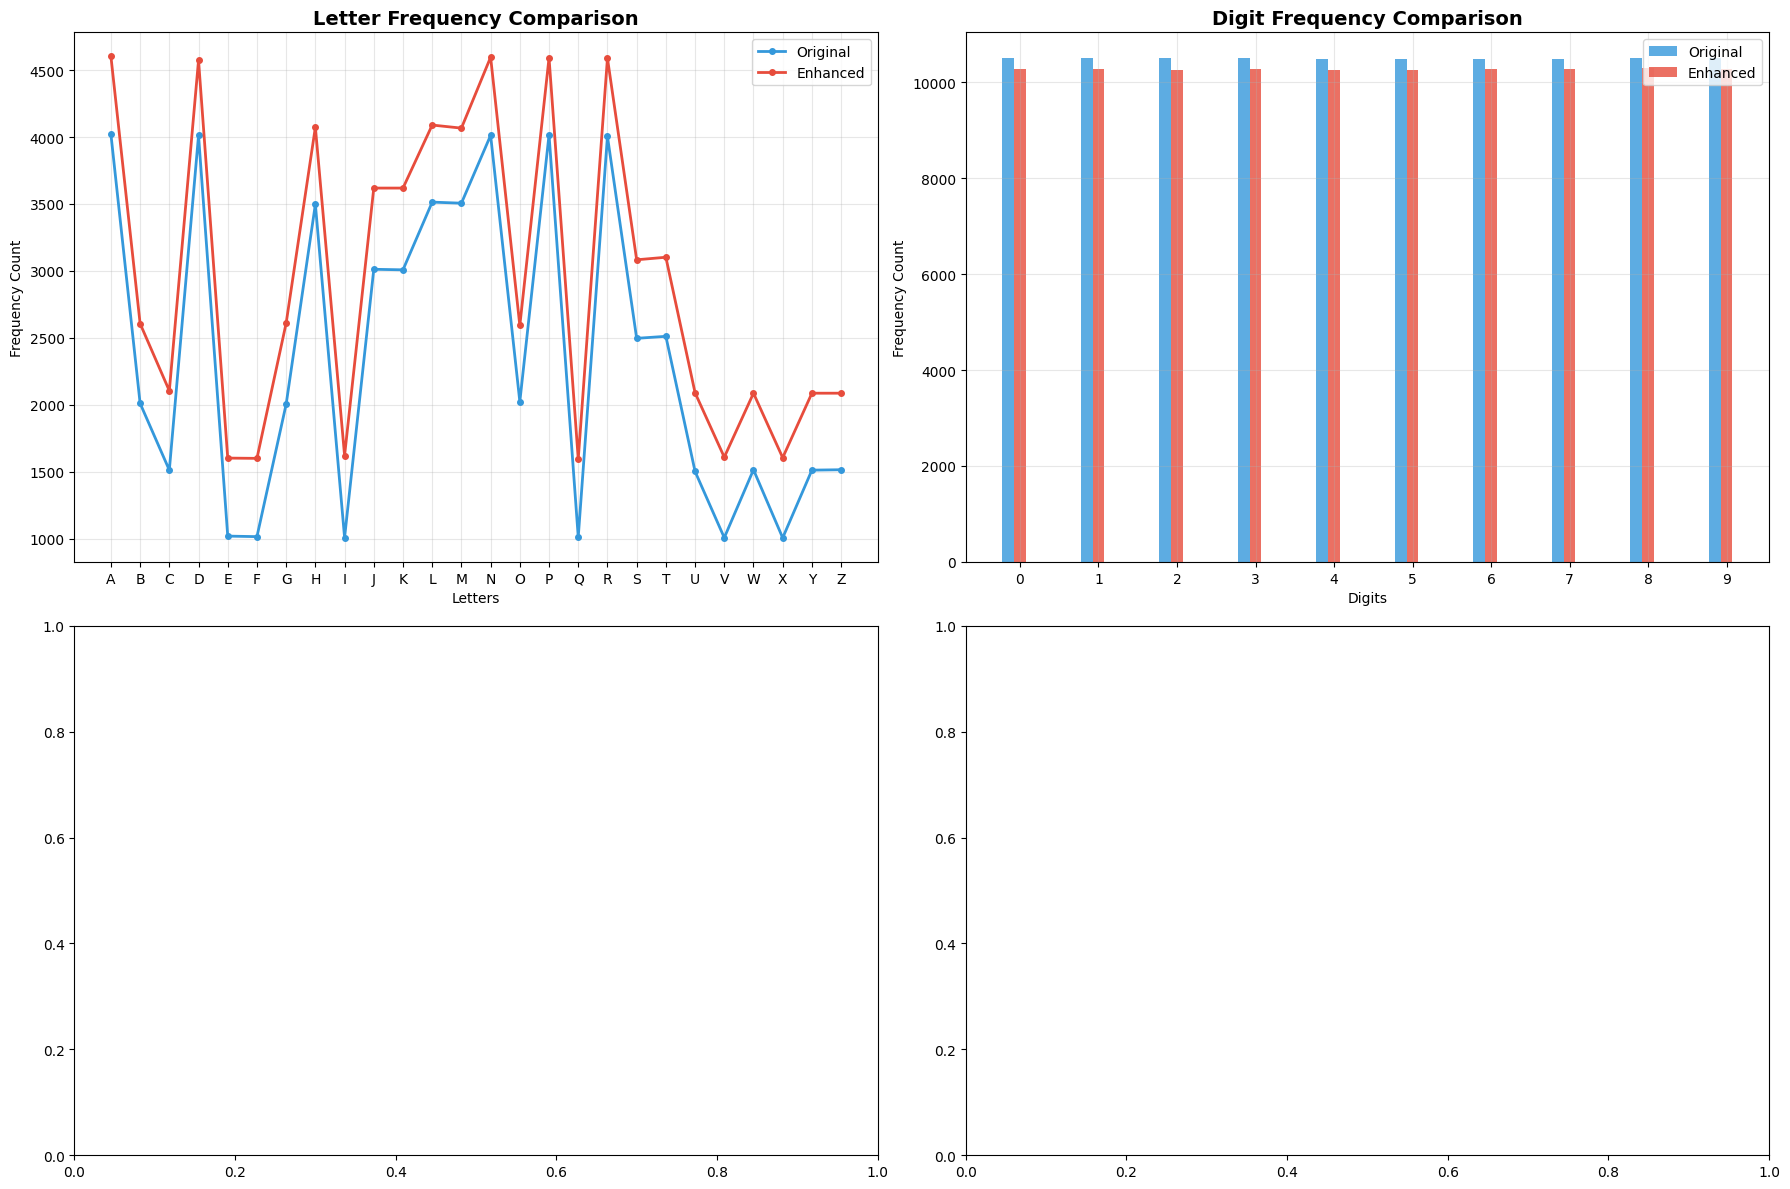

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict, Counter
import string
import re

def analyze_character_frequencies(file_path):
    """
    Analyze character frequencies from number plate text file
    Returns separate counters for letters and digits
    """
    letter_count = defaultdict(int)
    digit_count = defaultdict(int)
    total_plates = 0
    
    # Initialize all letters and digits to 0 for complete visualization
    for letter in string.ascii_uppercase:
        letter_count[letter] = 0
    for digit in string.digits:
        digit_count[digit] = 0
    
    try:
        with open(file_path, 'r') as f:
            for line in f:
                plate = line.strip().upper()
                if plate:
                    total_plates += 1
                    # Count all alphanumeric characters
                    for char in plate:
                        if char.isalpha() and char in string.ascii_uppercase:
                            letter_count[char] += 1
                        elif char.isdigit():
                            digit_count[char] += 1
    
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found!")
        return None, None, 0
    
    return dict(letter_count), dict(digit_count), total_plates

def plot_character_frequencies(file_path, save_plots=True, show_plots=True):
    """
    Create comprehensive plots for character frequency analysis
    """
    # Analyze frequencies
    letter_freq, digit_freq, total_plates = analyze_character_frequencies(file_path)
    
    if letter_freq is None:
        return
    
    # Prepare data for plotting
    letters = sorted(string.ascii_uppercase)
    digits = sorted(string.digits)
    
    letter_counts = [letter_freq[letter] for letter in letters]
    digit_counts = [digit_freq[digit] for digit in digits]
    
    # Calculate statistics
    total_letters = sum(letter_counts)
    total_digits = sum(digit_counts)
    total_chars = total_letters + total_digits
    
    print(f"Dataset Analysis:")
    print(f"- Total plates: {total_plates}")
    print(f"- Total letters: {total_letters}")
    print(f"- Total digits: {total_digits}")
    print(f"- Total characters: {total_chars}")
    print(f"- Letter percentage: {(total_letters/total_chars)*100:.1f}%")
    print(f"- Digit percentage: {(total_digits/total_chars)*100:.1f}%")
    
    # Create figure with multiple subplots
    fig = plt.figure(figsize=(20, 12))
    
    # Plot 1: Combined horizontal bar chart
    plt.subplot(2, 3, 1)
    all_chars = letters + digits
    all_counts = letter_counts + digit_counts
    colors = ['#3498db'] * 26 + ['#e74c3c'] * 10  # Blue for letters, red for digits
    
    bars = plt.barh(all_chars, all_counts, color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)
    plt.xlabel('Frequency Count', fontsize=12)
    plt.ylabel('Characters', fontsize=12)
    plt.title('Combined Character Frequency Distribution', fontsize=14, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    
    # Add value labels on bars
    for i, (bar, count) in enumerate(zip(bars, all_counts)):
        if count > 0:  # Only show non-zero values
            plt.text(count + max(all_counts)*0.01, bar.get_y() + bar.get_height()/2, 
                    str(count), ha='left', va='center', fontsize=8)
    
    # Plot 2: Letters only - vertical bar chart
    plt.subplot(2, 3, 2)
    bars_letters = plt.bar(letters, letter_counts, color='#3498db', alpha=0.8, 
                          edgecolor='black', linewidth=0.5)
    plt.xlabel('Letters', fontsize=12)
    plt.ylabel('Frequency Count', fontsize=12)
    plt.title('Alphabet Frequency Distribution', fontsize=14, fontweight='bold')
    plt.xticks(rotation=0)
    plt.grid(axis='y', alpha=0.3)
    
    # Add value labels on top of bars
    for bar, count in zip(bars_letters, letter_counts):
        if count > 0:
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(letter_counts)*0.01,
                    str(count), ha='center', va='bottom', fontsize=9, rotation=90)
    
    # Plot 3: Digits only - vertical bar chart
    plt.subplot(2, 3, 3)
    bars_digits = plt.bar(digits, digit_counts, color='#e74c3c', alpha=0.8,
                         edgecolor='black', linewidth=0.5)
    plt.xlabel('Digits', fontsize=12)
    plt.ylabel('Frequency Count', fontsize=12)
    plt.title('Numeric Frequency Distribution', fontsize=14, fontweight='bold')
    plt.grid(axis='y', alpha=0.3)
    
    # Add value labels on top of bars
    for bar, count in zip(bars_digits, digit_counts):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(digit_counts)*0.01,
                str(count), ha='center', va='bottom', fontsize=10)
    
    # Plot 4: Letter balance analysis
    plt.subplot(2, 3, 4)
    letter_min = min(letter_counts) if letter_counts else 0
    letter_max = max(letter_counts) if letter_counts else 0
    letter_mean = np.mean(letter_counts) if letter_counts else 0
    letter_std = np.std(letter_counts) if letter_counts else 0
    
    plt.bar(letters, letter_counts, color='#3498db', alpha=0.6)
    plt.axhline(y=letter_mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {letter_mean:.1f}')
    plt.axhline(y=letter_mean + letter_std, color='orange', linestyle=':', alpha=0.7, label=f'+1 STD: {letter_mean + letter_std:.1f}')
    plt.axhline(y=letter_mean - letter_std, color='orange', linestyle=':', alpha=0.7, label=f'-1 STD: {letter_mean - letter_std:.1f}')
    
    plt.xlabel('Letters', fontsize=12)
    plt.ylabel('Frequency Count', fontsize=12)
    plt.title('Letter Distribution Balance Analysis', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(axis='y', alpha=0.3)
    
    # Plot 5: Digit balance analysis
    plt.subplot(2, 3, 5)
    digit_min = min(digit_counts) if digit_counts else 0
    digit_max = max(digit_counts) if digit_counts else 0
    digit_mean = np.mean(digit_counts) if digit_counts else 0
    digit_std = np.std(digit_counts) if digit_counts else 0
    
    plt.bar(digits, digit_counts, color='#e74c3c', alpha=0.6)
    plt.axhline(y=digit_mean, color='blue', linestyle='--', linewidth=2, label=f'Mean: {digit_mean:.1f}')
    plt.axhline(y=digit_mean + digit_std, color='green', linestyle=':', alpha=0.7, label=f'+1 STD: {digit_mean + digit_std:.1f}')
    plt.axhline(y=digit_mean - digit_std, color='green', linestyle=':', alpha=0.7, label=f'-1 STD: {digit_mean - digit_std:.1f}')
    
    plt.xlabel('Digits', fontsize=12)
    plt.ylabel('Frequency Count', fontsize=12)
    plt.title('Digit Distribution Balance Analysis', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(axis='y', alpha=0.3)
    
    # Plot 6: Summary statistics pie chart
    plt.subplot(2, 3, 6)
    sizes = [total_letters, total_digits]
    labels = [f'Letters\n({total_letters})', f'Digits\n({total_digits})']
    colors = ['#3498db', '#e74c3c']
    explode = (0.05, 0.05)  # Slightly separate slices
    
    wedges, texts, autotexts = plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
                                      explode=explode, shadow=True, startangle=90)
    
    # Make percentage text bold and larger
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(12)
    
    plt.title('Letter vs Digit Distribution', fontsize=14, fontweight='bold')
    
    # Adjust layout and display
    plt.tight_layout(pad=3.0)
    
    # Add main title
    fig.suptitle(f'Character Frequency Analysis - {file_path}', fontsize=16, fontweight='bold', y=0.98)
    
    # Save plots if requested
    if save_plots:
        plt.savefig('character_frequency_analysis.png', dpi=300, bbox_inches='tight')
        print(f"Plot saved as 'character_frequency_analysis.png'")
    
    # Show plots if requested
    if show_plots:
        plt.show()
    
    # Print detailed statistics
    print(f"\nDetailed Statistics:")
    print(f"Letters - Min: {letter_min}, Max: {letter_max}, Mean: {letter_mean:.2f}, Std: {letter_std:.2f}")
    print(f"Digits - Min: {digit_min}, Max: {digit_max}, Mean: {digit_mean:.2f}, Std: {digit_std:.2f}")
    
    # Balance score (higher is better)
    letter_balance = (letter_min / letter_max * 100) if letter_max > 0 else 100
    digit_balance = (digit_min / digit_max * 100) if digit_max > 0 else 100
    
    print(f"\nBalance Scores (higher = more balanced):")
    print(f"Letter balance: {letter_balance:.1f}%")
    print(f"Digit balance: {digit_balance:.1f}%")
    
    return letter_freq, digit_freq

def compare_datasets(file_paths, labels=None):
    """
    Compare character frequencies across multiple datasets
    """
    if labels is None:
        labels = [f"Dataset {i+1}" for i in range(len(file_paths))]
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))
    
    colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6']
    
    for i, (file_path, label) in enumerate(zip(file_paths, labels)):
        letter_freq, digit_freq, _ = analyze_character_frequencies(file_path)
        if letter_freq is None:
            continue
            
        letters = sorted(string.ascii_uppercase)
        digits = sorted(string.digits)
        letter_counts = [letter_freq[letter] for letter in letters]
        digit_counts = [digit_freq[digit] for digit in digits]
        
        color = colors[i % len(colors)]
        
        # Letters comparison
        ax1.plot(letters, letter_counts, marker='o', label=label, color=color, linewidth=2, markersize=4)
        ax2.bar([x + i*0.15 for x in range(len(digits))], digit_counts, 
               width=0.15, label=label, color=color, alpha=0.8)
    
    ax1.set_title('Letter Frequency Comparison', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Letters')
    ax1.set_ylabel('Frequency Count')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    ax2.set_title('Digit Frequency Comparison', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Digits')
    ax2.set_ylabel('Frequency Count')
    ax2.set_xticks([x + 0.15 for x in range(len(digits))])
    ax2.set_xticklabels(digits)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Single dataset analysis
    # file_path = "balance_formatted_plates.txt"  # Change this to your file path
    
    # print("Analyzing character frequencies...")
    # letter_freq, digit_freq = plot_character_frequencies(file_path, save_plots=True, show_plots=True)
    
    # Uncomment below for comparison between datasets
    compare_datasets(
        ["balance_formatted_plates.txt", "formatted_plates.txt"],
        ["Original", "Enhanced"]
    )